In [328]:
import pandas as pd

df = pd.read_csv("Global YouTube Statistics.csv", encoding='unicode_escape') #데이터는 유튜브 구독자수랭킹 995위까지의 채널을 모아둠
#데이터에있는 채널들은 구독자수가 기본 천만이상에 2억 4천까지도 있음 이 잘나가는 채널들을 통해 채널의 성공요인과 수입예측을 진행해볼것임
df.info() #995개의 열과 28개의 feature들이 있는것을 확인가능
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [329]:
df.isnull().sum() #결측치값을 제거해야하지만 'subscribers_for_last_30_day' feature가 337개나 갖고있어 제거하면 많은데이터가 사라진다.

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [330]:
df = df.drop('subscribers_for_last_30_days', axis = 1) #따라서 그냥 feature자체를 없애주고, 결측치 행들을 전부 지워줄거다

In [331]:
df = df.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 994
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     808 non-null    int64  
 1   Youtuber                                 808 non-null    object 
 2   subscribers                              808 non-null    int64  
 3   video views                              808 non-null    float64
 4   category                                 808 non-null    object 
 5   Title                                    808 non-null    object 
 6   uploads                                  808 non-null    int64  
 7   Country                                  808 non-null    object 
 8   Abbreviation                             808 non-null    object 
 9   channel_type                             808 non-null    object 
 10  video_views_rank                         808 non-n

In [332]:
len(df['Country'].unique()) #상위800개의 유튜버들의 국가를 확인해보니 총 47개의 국가가 있었다.

47

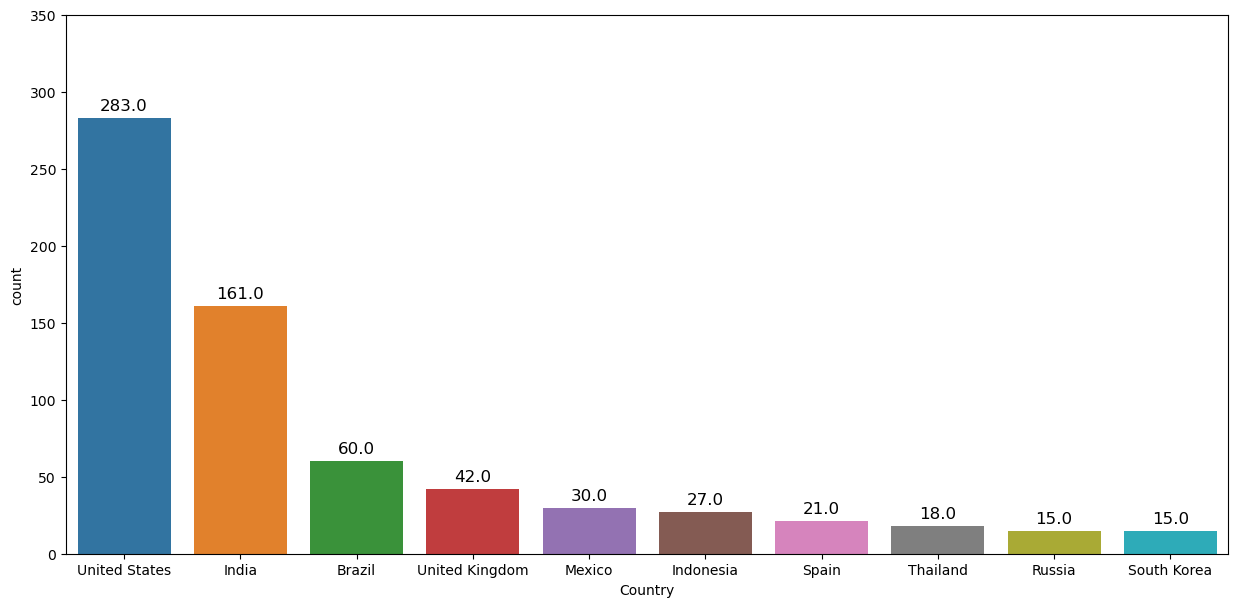

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 7))
ax = sns.countplot(data = df, x = 'Country', order = df['Country'].value_counts().head(10).index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, height, ha = 'center', size = 12)
ax.set_ylim(0, 350)
plt.show() #top1000유튜브채널중 미국이 압도적으로 30퍼이상을차지하고 인도, 브라질이 따라온다 한국은 15개 채널로 10등에 위치한걸 확인가능

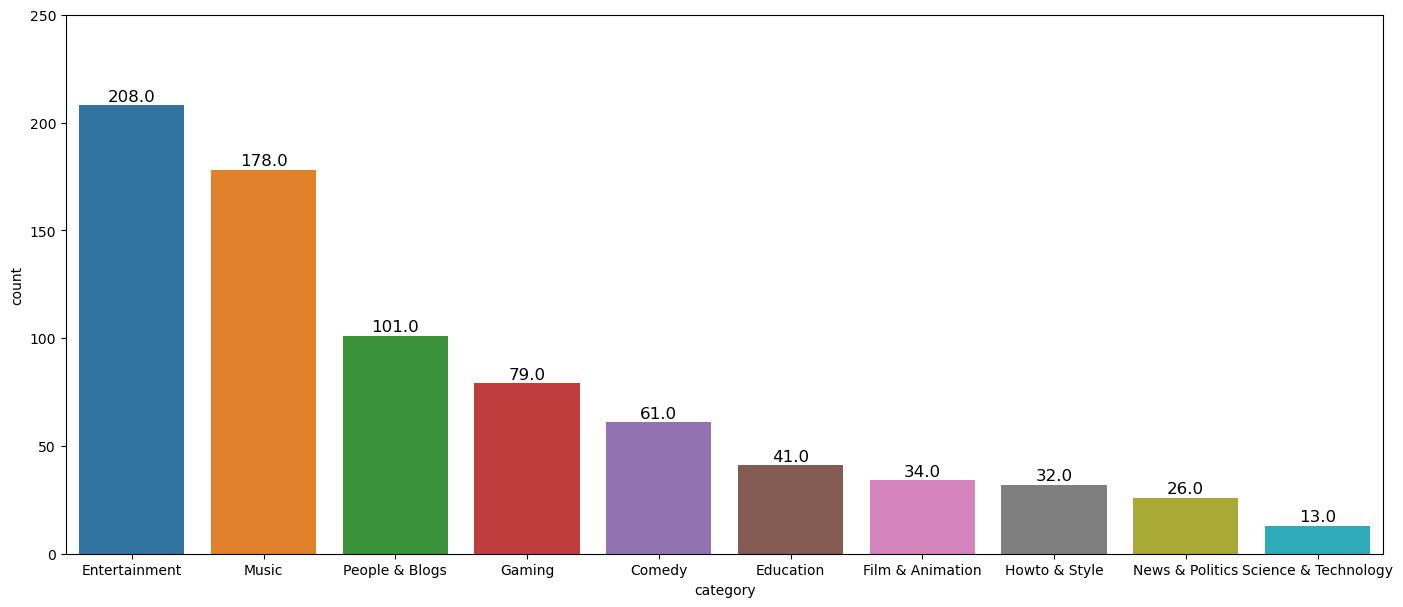

In [185]:
plt.figure(figsize = (17, 7))
ax = sns.countplot(data = df, x = 'category', order = df['category'].value_counts().head(10).index)

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 2, height, ha = 'center', size = 12)
ax.set_ylim(0, 250)
plt.show() #카테고리들을 히스토그램으로 나타내보니 예능이나 오락채널인 엔터테이먼트가 241개로 1등 다음으로 조그마한 차이로 음악이 따라온다.
#peopleblog랑 game

<Axes: title={'center': 'category'}>

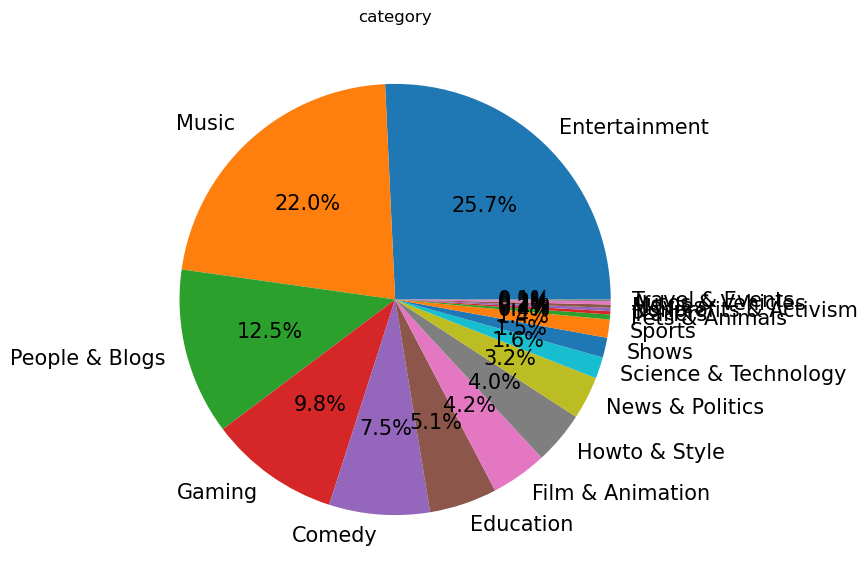

In [186]:
plt.figure(figsize = (7, 7))
explode = [0.05 for i in range(len(df['category'].unique()))]
df['category'].value_counts().plot.pie(ylabel='', title = 'category',
                                            autopct = '%1.1f%%', fontsize = 15) #game까지 70%이상임을 확인가능 유튜브에서 성공하려면
#정보도 더 많고 관심도 많은 entertainment나 music, 게임 방송을 하는게 좋겠다...

In [187]:
df_k = df[df['Country'] == 'South Korea'] #이제 한국채널의 방송유형을 살펴보자
df_k #딱봐도 idol이나 k-pop 채널이 많이 보인다

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,highest_yearly_earnings,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
13,14,BLACKPINK,89800000,3.214460e+10,People & Blogs,BLACKPINK,543,South Korea,KR,Music,...,23900000.0,2016.0,Jun,29.0,94.3,51709098.0,4.15,42106719.0,35.907757,127.766922
17,18,BANGTANTV,75600000,2.082699e+10,Music,BANGTANTV,2281,South Korea,KR,Music,...,8100000.0,2012.0,Dec,17.0,94.3,51709098.0,4.15,42106719.0,35.907757,127.766922
20,21,HYBE LABELS,71300000,2.863457e+10,Music,HYBE LABELS,1337,South Korea,KR,Music,...,28700000.0,2008.0,Jun,4.0,94.3,51709098.0,4.15,42106719.0,35.907757,127.766922
195,196,JYP Entertainment,27400000,1.988315e+10,Music,JYP Entertainment,1753,South Korea,KR,Music,...,14800000.0,2008.0,Jan,25.0,94.3,51709098.0,4.15,42106719.0,35.907757,127.766922
250,251,1theK (ï¿½ï¿½ï¿½ï¿½ï,24500000,2.396207e+10,Music,1theK (ï¿½ï¿½ï¿½ï¿½ï,18950,South Korea,KR,Entertainment,...,5100000.0,2011.0,Jan,31.0,94.3,51709098.0,4.15,42106719.0,35.907757,127.766922
372,373,Mnet K-POP,20500000,1.503859e+10,Entertainment,Mnet K-POP,33229,South Korea,KR,Entertainment,...,7600000.0,2006.0,Mar,9.0,94.3,51709098.0,4.15,42106719.0,35.907757,127.766922
438,439,KBS WORLD TV,19000000,1.512609e+10,Entertainment,KBS WORLD TV,64496,South Korea,KR,Entertainment,...,5200000.0,2007.0,Jan,6.0,94.3,51709098.0,4.15,42106719.0,35.907757,127.766922
475,476,officialpsy,18100000,1.070383e+10,Music,officialpsy,131,South Korea,KR,Music,...,3100000.0,2010.0,Oct,4.0,94.3,51709098.0,4.15,42106719.0,35.907757,127.766922
510,511,JFlaMusic,17600000,3.802280e+09,Music,JFlaMusic,326,South Korea,KR,Music,...,532700.0,2011.0,Aug,22.0,94.3,51709098.0,4.15,42106719.0,35.907757,127.766922
671,672,BIGBANG,15100000,7.857372e+09,Music,BIGBANG,776,South Korea,KR,Music,...,2000000.0,2005.0,Oct,10.0,94.3,51709098.0,4.15,42106719.0,35.907757,127.766922


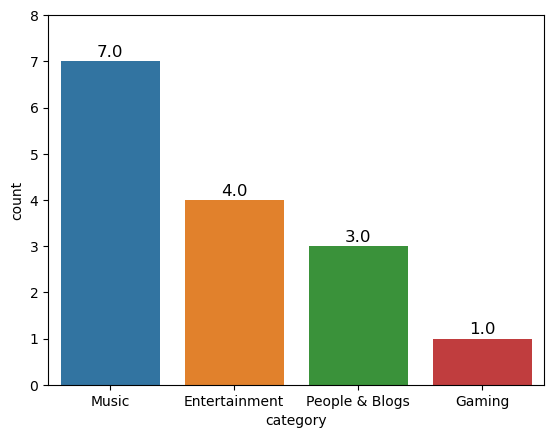

In [188]:
ax = sns.countplot(data = df_k, x = 'category', order = df_k['category'].value_counts().head().index)


# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha = 'center', size = 12)
ax.set_ylim(0, 8)
plt.show() #히스토그램으로 확인해보니 entertainment에 음악방송도 포함되서 8개 즉 반 이상이 k-pop관련 채널이다. 역시 아이돌 강국...

In [336]:
#이제 수입을 예측할 것이니
#연 최고수입과 연최저수입의 평균을 내서 연수입column을 만들자
df['yearly_earnings'] = (df['highest_yearly_earnings'] + df['lowest_yearly_earnings']) / 2
df[['yearly_earnings', 'highest_yearly_earnings', 'lowest_yearly_earnings']]

,yearly_earnings,highest_yearly_earnings,lowest_yearly_earnings
0,57600000.00,1.084000e+08,6800000.00
1,0.31,5.800000e-01,0.04
2,34350000.00,6.470000e+07,4000000.00
3,50350000.00,9.480000e+07,5900000.00
4,46500000.00,8.750000e+07,5500000.00
...,...,...,...
989,1274100.00,2.400000e+06,148200.00
990,14100000.00,2.650000e+07,1700000.00
991,1647100.00,3.100000e+06,194200.00
993,98700.00,1.858000e+05,11600.00


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     808 non-null    int64  
 1   Youtuber                                 808 non-null    object 
 2   subscribers                              808 non-null    int64  
 3   video views                              808 non-null    float64
 4   category                                 808 non-null    object 
 5   Title                                    808 non-null    object 
 6   uploads                                  808 non-null    int64  
 7   Country                                  808 non-null    object 
 8   Abbreviation                             808 non-null    object 
 9   channel_type                             808 non-null    object 
 10  video_views_rank                         808 non-n

In [191]:
#이제 linearegression을 통해 회귀분석을 할것이기 때문에 수치형 데이터컬럼만 남겨준다. 또한 나라의 실업률, 고등 교육률, 국가의 위도경도등은
#우리가 유튜브채널을 만들어서 운영한다고할때 조절할수 없는 요인들이므로 이것들은 빼고 진행하겠다.
#수치형데이터들간의 상관관계 heatmap을 보여주고

<Axes: >

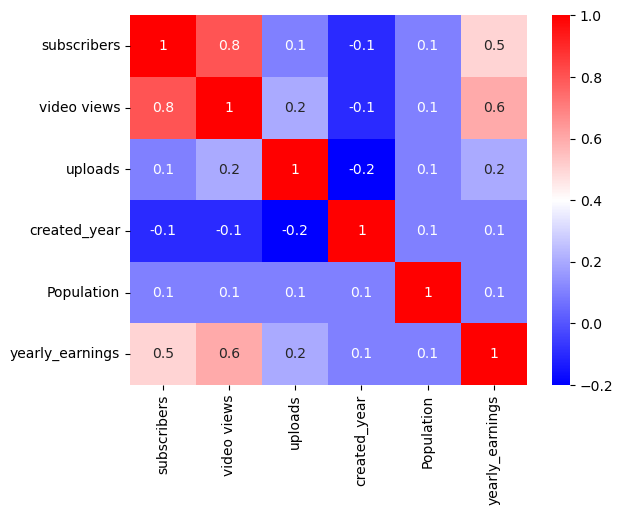

In [279]:
df_lr = df[['subscribers', 'video views', 'uploads', 'created_year', 'Population', 'yearly_earnings']]
correlation_matrix = df_lr.corr().round(1)
sns.heatmap(data = correlation_matrix, annot = True, cmap='bwr')

In [292]:
#일단은 높은 상관관계를 가지고있는 특징중 하나인 구독자수를 통해 연수입을 예측해보자
import numpy as np
from sklearn.model_selection import train_test_split

X_sub = df_lr['subscribers']
y_earn = df_lr['yearly_earnings']
X_sub = np.array(X_sub).reshape(-1, 1)

#train_test_split를 이용해 훈련용, 테스트용 데이터를 8:2로 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(X_sub, y_earn,
                 test_size = 0.2,
                 random_state = 77)

In [293]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_sub, y_earn)

LinearRegression()

In [294]:
from sklearn.metrics import mean_squared_error #rmse가 작을수록 좋은것 연수입 단위가 커서 크게 나오긴했음

y_train_predict = reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("For training set")
print("RMSE is ", rmse)

For training set
RMSE is  6016174.478731269


In [295]:
y_test_predict = reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("For test set")
print("RMSE is ", rmse)

For test set
RMSE is  5372666.424711112


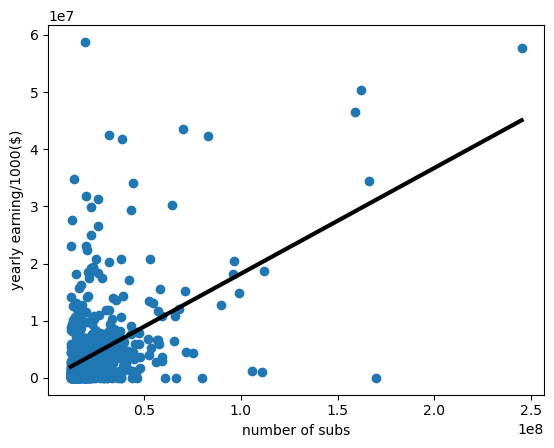

In [296]:
prediction_space = np.linspace(min(X_sub), max(X_sub))
plt.scatter(X_sub, y_earn)
plt.plot(prediction_space, reg.predict(prediction_space),
         color = 'black', linewidth = 3)
plt.ylabel('yearly earning/1000($)')
plt.xlabel('number of subs')
plt.show()

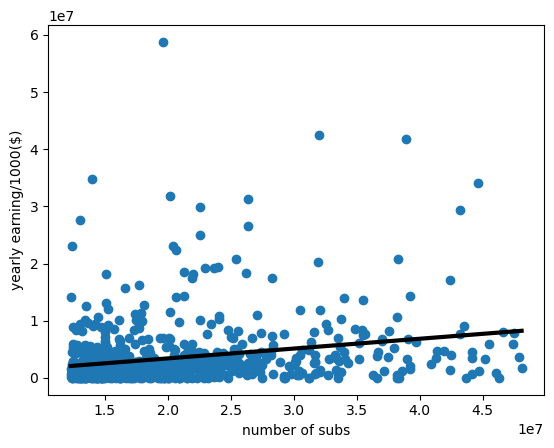

In [297]:
df_lr5 = df_lr[df_lr['subscribers'] < 50000000] #5천만 구독자이상은 사실 너무 적으니 5천만 이하의 채널들만 살펴보자

X_sub = df_lr5['subscribers']
y_earn = df_lr5['yearly_earnings']
X_sub = np.array(X_sub).reshape(-1, 1)


X_train, X_test, y_train, y_test = \
train_test_split(X_sub, y_earn,
                 test_size = 0.3,
                 random_state = 77)

reg = LinearRegression()
reg.fit(X_sub, y_earn)

prediction_space = np.linspace(min(X_sub), max(X_sub))
plt.scatter(X_sub, y_earn)
plt.plot(prediction_space, reg.predict(prediction_space),
         color = 'black', linewidth = 3)
plt.ylabel('yearly earning/1000($)')
plt.xlabel('number of subs')
plt.show() #몇가지 튀오나온 점들이 있지만 대체로 예측선을 따라가는 경향성이있음을 확인

In [298]:
#이제 구독자수를 통해 연수입을 예측해보자!
print(reg.predict([[1000000]])) #100만명 채널의 연수익 예측값은 2억정도
print(reg.predict([[500000]])) #50만명 채널의 연수익 예측값은 8천만원

[149434.07198932]
[63552.12820991]


In [299]:
#이제 구독자수 뿐만 아니라 비디오 뷰수, 업로드수, 인구 등 까지 다변수 회귀분석을 해보자
X = df_lr.drop('yearly_earnings', axis = 1)#axis가0일경우 index, 1일 경우 colimns제거
y = df_lr['yearly_earnings']

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2,
                 random_state = 77)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [300]:
y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("For training set")
print("RMSE is ", rmse)

For training set
RMSE is  5243563.199390768


In [301]:
y_test_predict = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("For test set")
print("RMSE is ", rmse)

For test set
RMSE is  4316246.653554859


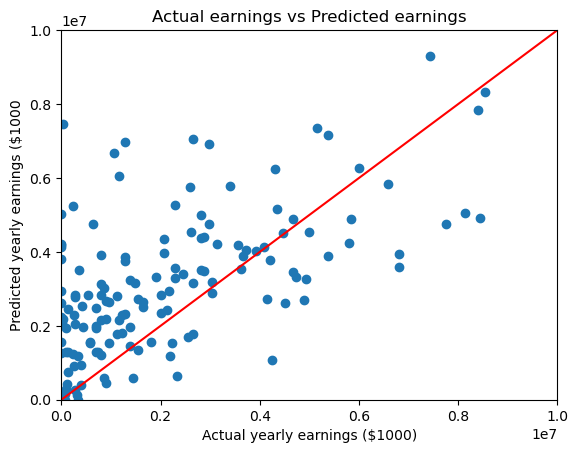

In [320]:
plt.scatter(y_test, y_test_predict)
plt.xlim([0, 10000000])
plt.ylim([0, 10000000])
plt.xlabel("Actual yearly earnings ($1000)")
plt.ylabel("Predicted yearly earnings ($1000")
plt.title("Actual earnings vs Predicted earnings")
plt.plot([0, 40000000], [0, 40000000], 'r')

In [326]:
#이번에는 선형회귀의 다른종류인 ridge regression을 이용해보자 과적합이 안되게 특화된 방법
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
y_pred = ridge.predict(X_test)

y_train_predict = ridge.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("For training set")
print("RMSE is ", rmse)

y_test_predict = ridge.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print("For test set")
print("RMSE is ", rmse)

For training set
RMSE is  5243563.199976563
For test set
RMSE is  4316255.477563959


C:\Users\flhbi\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=6.73827e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
